In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv


In [2]:
df = pd.read_csv("/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [4]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [5]:
df.shape

(10000, 6)

In [6]:
df.duplicated().sum()

127

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
encoder = LabelEncoder()

In [9]:
df['Extracurricular Activities']  = encoder.fit_transform(df['Extracurricular Activities'])

In [10]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [11]:
df.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.010676,0.004899,0.002131,0.015740,0.375332
Previous Scores,-0.010676,1.000000,0.009534,0.007975,0.008719,0.915135
Extracurricular Activities,0.004899,0.009534,1.000000,-0.024008,0.013839,0.026075
Sleep Hours,0.002131,0.007975,-0.024008,1.000000,0.004907,0.050352
Sample Question Papers Practiced,0.015740,0.008719,0.013839,0.004907,1.000000,0.043436
Performance Index,0.375332,0.915135,0.026075,0.050352,0.043436,1.000000


In [12]:
import seaborn as sns


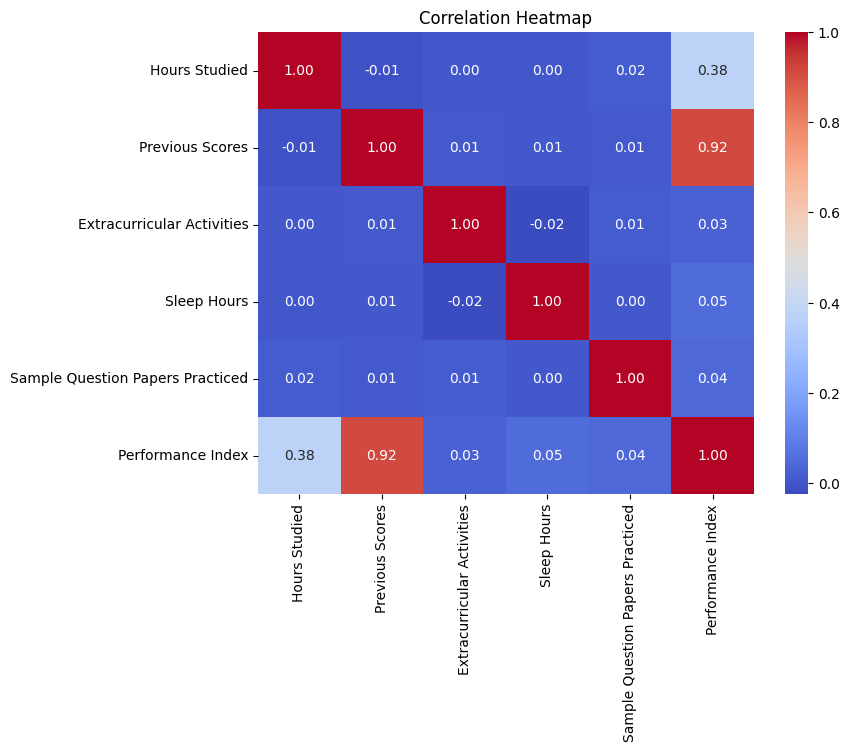

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

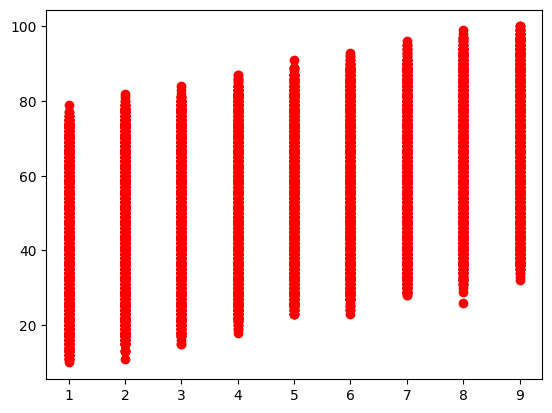

In [14]:
plt.scatter(df['Hours Studied'],df['Performance Index'],color='r')

In [15]:
## independet and dependent features
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

In [16]:
X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [17]:
y.head()

0    91.0
1    65.0
2    45.0
3    36.0
4    66.0
Name: Performance Index, dtype: float64

In [18]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

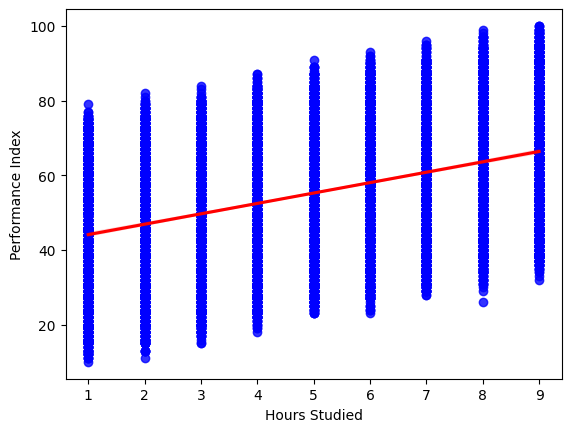

In [19]:
sns.regplot(x=df['Hours Studied'], y=df['Performance Index'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

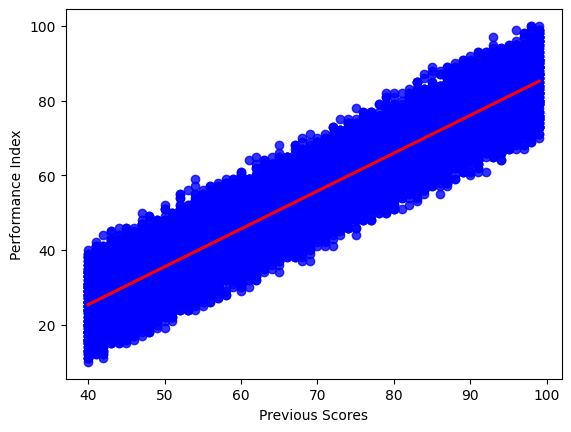

In [20]:
sns.regplot(x=df['Previous Scores'], y=df['Performance Index'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

<Axes: xlabel='Sleep Hours', ylabel='Performance Index'>

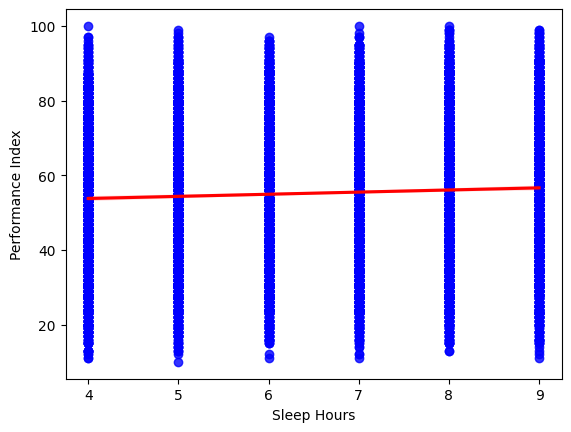

In [21]:
sns.regplot(x=df['Sleep Hours'], y=df['Performance Index'], scatter_kws={"color": "blue"}, line_kws={"color": "red"})

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [23]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
from sklearn.linear_model import LinearRegression
rg = LinearRegression()

In [25]:
rg.fit(X_train,y_train)

LinearRegression()

In [26]:
# cross validation score
from sklearn.model_selection import cross_val_score
val_score = cross_val_score(rg,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [27]:
np.mean(val_score)

-4.1384313811409665

In [28]:
y_prdt = rg.predict(X_test)

In [29]:
y_prdt

array([46.47674371, 80.27452611, 61.05760438, ..., 58.56041781,
       38.62446369, 33.82296889])

In [30]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [31]:
mse=mean_squared_error(y_test,y_prdt)
mae=mean_squared_error(y_test,y_prdt)
rmse = np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

4.317099922622565
4.317099922622565
2.077763201768326


In [32]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_prdt)
print(score)

0.9883149212472456


# Assumptions

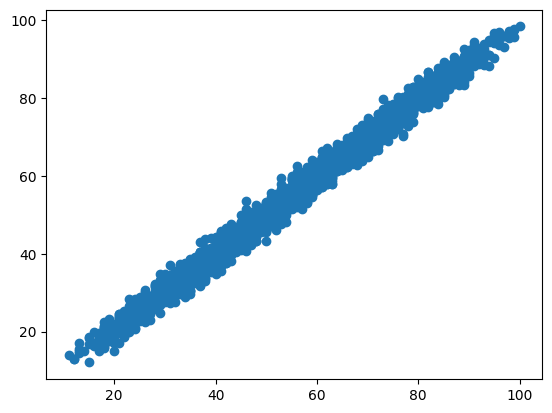

In [33]:
plt.scatter(y_test,y_prdt)

In [34]:
residuals = y_test - y_prdt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


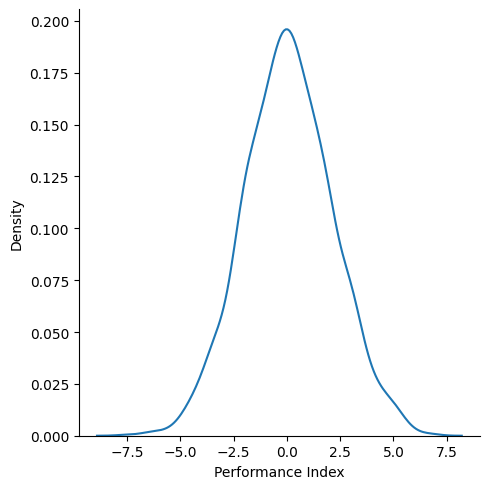

In [35]:
sns.displot(residuals,kind='kde')

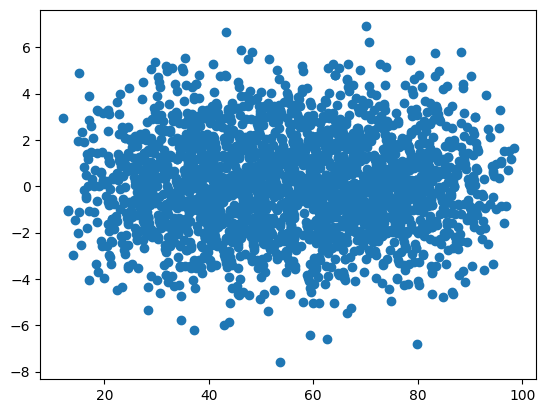

In [36]:
# scatter plot with respect to prediction and residuals 
plt.scatter(y_prdt,residuals)

In [37]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()

In [38]:
print(model.predict(X_test))

6099    51.020551
106     81.492731
9265    62.404483
4707    30.512549
2155    66.194016
          ...    
5571    57.889747
8872    66.444591
8257    62.799576
5677    43.799033
5766    40.085026
Length: 2469, dtype: float64


In [39]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.478e+05
Date:                Wed, 09 Jul 2025   Prob (F-statistic):                        0.00
Time:                        18:03:26   Log-Likelihood:                         -23532.
No. Observations:                7404   AIC:                                  4.707e+04
Df Residuals:                    7399   BIC:                                  4.711e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [40]:
print(rg.coef_)

[2.85364318 1.01801988 0.57797717 0.4715297  0.19003358]
